In [131]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [132]:
import numpy as np
from matplotlib import pyplot as plt
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster import cluster_visualizer

from sklearn.preprocessing import minmax_scale
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics import adjusted_rand_score
from pandas import crosstab

In [133]:
df= pd.read_excel('after_EDA_final_dd.xlsx')

In [134]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80.0  26.083333   
1                   A  ...              0.0   13.70  63.0  26.000000   
2                   A  ...              0.0  812.40  61.0  26.000000   
3                   A  ...              0.0  128.78  56.0  25.916667   
4                   A  ...              0.0 -100.63  60.0  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  0                       0.00                    0   
2                  1                   47205.46                    0   
3                  1                  170194.41                    0   
4                  1                   37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647  

[5 rows x 39 columns]

In [135]:
df.shape

(24875, 39)

In [136]:
pd.set_option('display.max_rows', None)

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [139]:
df.shape

(22896, 39)

In [140]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE'
    
                ]]

In [141]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [142]:
df_selected.shape

(22896, 7)

In [143]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0               8.782233  80.0     8.008889  26.083333   
1              15.657527  63.0  3713.374413  26.000000   
2               5.319444  61.0     9.591558  26.000000   
3              49.102532  56.0    95.901806  25.916667   
4              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [144]:
df_new.shape

(22896, 6)

In [145]:
df_new.dtypes

AVG_LIMIT_UTILIZATION         float64
AGE                           float64
PAYMENT_AVG                   float64
CC_AGE                        float64
CUSTOMER_PROFITABILITY        float64
CUSTOMER_DEBIT_ACC_BALANCE    float64
dtype: object

In [146]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION         0
AGE                           0
PAYMENT_AVG                   0
CC_AGE                        0
CUSTOMER_PROFITABILITY        0
CUSTOMER_DEBIT_ACC_BALANCE    0
dtype: int64

In [147]:
from sklearn.preprocessing import MinMaxScaler
X1 = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [148]:
X = np.asarray(X1)

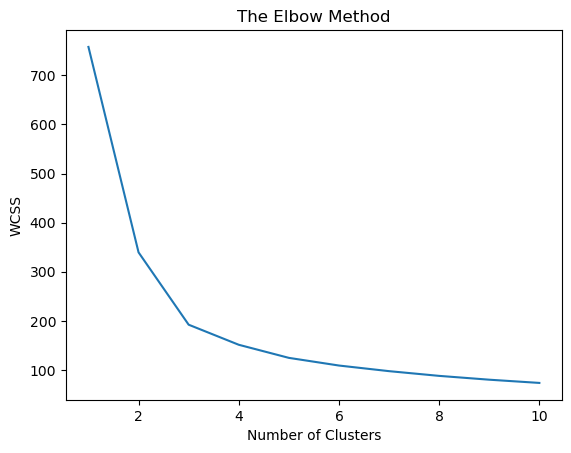

In [149]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [150]:
[initial_centers, indexes] = kmeans_plusplus(X,n_clusters=3,random_state=9)

In [151]:
kmedians_instance = kmedians(X,initial_centers); 
kmedians_instance.process();
medians = np.array(kmedians_instance.get_medians()); 
kmedians_clusters = kmedians_instance.get_clusters() 




In [153]:
medians

array([[1.62747703e-02, 8.68544601e-02, 5.12235332e-03, 3.22580645e-02,
        5.43315661e-01, 9.62664488e-04],
       [1.51567212e-02, 8.92018779e-02, 5.12144833e-03, 9.67741935e-02,
        5.42827207e-01, 7.73524387e-05],
       [1.36425104e-02, 1.54929577e-01, 5.12271180e-03, 3.12903226e-01,
        5.42062656e-01, 0.00000000e+00]])

In [154]:
kmedians_clusters

[[7889,
  17481,
  22819,
  9159,
  22840,
  22749,
  22867,
  11047,
  17831,
  8457,
  22874,
  9480,
  14400,
  17299,
  11106,
  10550,
  13891,
  22060,
  15084,
  10766,
  22866,
  22846,
  9824,
  15104,
  10193,
  10977,
  22853,
  11179,
  11199,
  15956,
  8754,
  10948,
  16004,
  10663,
  11839,
  15425,
  17807,
  10559,
  10865,
  22864,
  15459,
  15109,
  10243,
  10631,
  16019,
  9236,
  9644,
  10644,
  22854,
  10044,
  9633,
  10234,
  17722,
  10696,
  20672,
  11624,
  8467,
  17517,
  9215,
  9430,
  16378,
  10888,
  11026,
  20759,
  11711,
  9555,
  11099,
  20908,
  22068,
  9180,
  16534,
  8738,
  18114,
  10826,
  20767,
  10945,
  15073,
  9126,
  16028,
  9333,
  11354,
  11608,
  16490,
  11289,
  10930,
  15515,
  10098,
  18149,
  16084,
  15770,
  9320,
  9390,
  20145,
  16458,
  19115,
  14297,
  9639,
  10714,
  10379,
  8856,
  19046,
  22857,
  16304,
  14987,
  16506,
  21587,
  8911,
  20209,
  14269,
  11630,
  14591,
  20399,
  10726,
  109

In [155]:
len(kmedians_clusters[0])


8222

In [156]:
len(kmedians_clusters[1])

9614

In [157]:
len(kmedians_clusters[2])

5060

In [158]:


# Assuming kmedians_clusters[0] is your array
array_data_0 = kmedians_clusters[0]
# Convert array to DataFrame
kmedian_cluster_0 = pd.DataFrame(array_data_0, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster_0['cluster'] = 0

# Display the DataFrame
print(kmedian_cluster_0)



      value  cluster
0      7889        0
1     17481        0
2     22819        0
3      9159        0
4     22840        0
5     22749        0
6     22867        0
7     11047        0
8     17831        0
9      8457        0
10    22874        0
11     9480        0
12    14400        0
13    17299        0
14    11106        0
15    10550        0
16    13891        0
17    22060        0
18    15084        0
19    10766        0
20    22866        0
21    22846        0
22     9824        0
23    15104        0
24    10193        0
25    10977        0
26    22853        0
27    11179        0
28    11199        0
29    15956        0
30     8754        0
31    10948        0
32    16004        0
33    10663        0
34    11839        0
35    15425        0
36    17807        0
37    10559        0
38    10865        0
39    22864        0
40    15459        0
41    15109        0
42    10243        0
43    10631        0
44    16019        0
45     9236        0
46     9644  

In [159]:
# Assuming kmedians_clusters[0] is your array
array_data_1 = kmedians_clusters[1]
# Convert array to DataFrame
kmedian_cluster_1 = pd.DataFrame(array_data_1, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster_1['cluster'] = 1

# Display the DataFrame
print(kmedian_cluster_1)


      value  cluster
0     13258        1
1     20994        1
2      2463        1
3     20999        1
4     20956        1
5     20973        1
6     20942        1
7     20984        1
8     20949        1
9     20963        1
10    20992        1
11    20977        1
12    20985        1
13    20964        1
14    22832        1
15    20998        1
16    20961        1
17    20986        1
18    20959        1
19     3920        1
20    20978        1
21     7419        1
22    20940        1
23    20946        1
24     6144        1
25    22835        1
26     6806        1
27     6519        1
28     2351        1
29    20988        1
30    20965        1
31    13899        1
32     7349        1
33     7864        1
34    21776        1
35    21000        1
36    20990        1
37     8807        1
38     7801        1
39    20979        1
40     7546        1
41     3769        1
42    20980        1
43    22837        1
44     4007        1
45     6093        1
46    22827  

In [160]:
# Assuming kmedians_clusters[0] is your array
array_data_2 = kmedians_clusters[2]
# Convert array to DataFrame
kmedian_cluster_2 = pd.DataFrame(array_data_2, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster_2['cluster'] = 2

# Display the DataFrame
print(kmedian_cluster_2)


      value  cluster
0       334        2
1      2640        2
2      1310        2
3      2106        2
4      1198        2
5     22139        2
6     22559        2
7      4630        2
8      2289        2
9      2029        2
10     4178        2
11       63        2
12      638        2
13     4167        2
14     1311        2
15     1077        2
16      106        2
17      282        2
18    22484        2
19      661        2
20     5325        2
21     1839        2
22     1352        2
23     2382        2
24     1189        2
25     2044        2
26      717        2
27     5466        2
28      315        2
29     4808        2
30      439        2
31     4781        2
32     1916        2
33     2123        2
34     2296        2
35    22148        2
36     2366        2
37     1837        2
38    12250        2
39     4929        2
40        6        2
41     1738        2
42    12256        2
43      286        2
44     2384        2
45      280        2
46    22206  

In [161]:
Kmedian_df = pd.concat([kmedian_cluster_0,kmedian_cluster_1,kmedian_cluster_2],ignore_index = True)

In [162]:
Kmedian_df.shape

(22896, 2)

In [163]:
Kmedian_df.head()

value  cluster
0   7889        0
1  17481        0
2  22819        0
3   9159        0
4  22840        0

In [164]:
Kmedian_df_sort = Kmedian_df.sort_values(by=['value'])

In [165]:
# clusters
silhouette_avg = silhouette_score(X, Kmedian_df_sort['cluster'])
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.25158290205746786


In [166]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score



db_index = davies_bouldin_score(X, Kmedian_df_sort['cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(X, Kmedian_df_sort['cluster'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, Kmedian_df_sort['cluster'])

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Davies-Bouldin Index: 1.1948801628709205
Silhouette Score: 0.25158290205746786
Calinski-Harabasz Index: 17946.61531053576


In [167]:
[initial_centers, indexes] = kmeans_plusplus(X,n_clusters=2,random_state=9)
kmedians_instance = kmedians(X,initial_centers); 
kmedians_instance.process();
medians = np.array(kmedians_instance.get_medians()); 
kmedians_clusters_2 = kmedians_instance.get_clusters() 
print("Cluster 1 : " ,len(kmedians_clusters_2[0]))
print("Cluster 2 : " , len(kmedians_clusters_2[1]))


# Assuming kmedians_clusters[0] is your array
array_data2_0 = kmedians_clusters_2[0]
# Convert array to DataFrame
kmedian_cluster2_0 = pd.DataFrame(array_data2_0, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster2_0['cluster'] = 0

# Assuming kmedians_clusters[0] is your array
array_data2_1 = kmedians_clusters_2[1]
# Convert array to DataFrame
kmedian_cluster2_1 = pd.DataFrame(array_data2_1, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster2_1['cluster'] = 1
print(kmedian_cluster2_0.shape)
print(kmedian_cluster2_1.shape)



Kmedian_df2 = pd.concat([kmedian_cluster2_0,kmedian_cluster2_1],ignore_index = True)

Kmedian_df2_sort = Kmedian_df2.sort_values(by=['value'])

silhouette_avg2 = silhouette_score(X, Kmedian_df2_sort['cluster'])
print("For n_clusters =", 2,
      "The average silhouette_score is :", silhouette_avg2)

Cluster 1 :  7207
Cluster 2 :  15689
(7207, 2)
(15689, 2)
For n_clusters = 2 The average silhouette_score is : 0.5224268297111204


In [168]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

db_index = davies_bouldin_score(X, Kmedian_df2_sort['cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(X, Kmedian_df2_sort['cluster'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, Kmedian_df2_sort['cluster'])

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Davies-Bouldin Index: 0.783143260382422
Silhouette Score: 0.5224268297111204
Calinski-Harabasz Index: 25599.5606617554


In [169]:
[initial_centers, indexes] = kmeans_plusplus(X,n_clusters=4,random_state=9)
kmedians_instance = kmedians(X,initial_centers); 
kmedians_instance.process();
medians = np.array(kmedians_instance.get_medians()); 
kmedians_clusters_4 = kmedians_instance.get_clusters() 
print("Cluster 1 : " ,len(kmedians_clusters_4[0]))
print("Cluster 2 : " , len(kmedians_clusters_4[1]))
print("Cluster 3 : " ,len(kmedians_clusters_4[2]))
print("Cluster 4 : " , len(kmedians_clusters_4[3]))

# Assuming kmedians_clusters[0] is your array
array_data4_0 = kmedians_clusters_4[0]
# Convert array to DataFrame
kmedian_cluster4_0 = pd.DataFrame(array_data4_0, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster4_0['cluster'] = 0

# Assuming kmedians_clusters[0] is your array
array_data4_1 = kmedians_clusters_4[1]
# Convert array to DataFrame
kmedian_cluster4_1 = pd.DataFrame(array_data4_1, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmedian_cluster4_1['cluster'] = 1


array_data4_2 = kmedians_clusters_4[2]
kmedian_cluster4_2 = pd.DataFrame(array_data4_2, columns=['value'])
kmedian_cluster4_2['cluster'] = 2

array_data4_3 = kmedians_clusters_4[3]
kmedian_cluster4_3 = pd.DataFrame(array_data4_3, columns=['value'])
kmedian_cluster4_3['cluster'] = 3



print(kmedian_cluster4_0.shape)
print(kmedian_cluster4_1.shape)
print(kmedian_cluster4_2.shape)
print(kmedian_cluster4_3.shape)




Kmedian_df3 = pd.concat([kmedian_cluster4_0,kmedian_cluster4_1,kmedian_cluster4_2,kmedian_cluster4_3],ignore_index = True)

Kmedian_df3_sort = Kmedian_df3.sort_values(by=['value'])

silhouette_avg3 = silhouette_score(X, Kmedian_df3_sort['cluster'])
print("For n_clusters =", 4,
      "The average silhouette_score is :", silhouette_avg3)

Cluster 1 :  14
Cluster 2 :  17128
Cluster 3 :  982
Cluster 4 :  4772
(14, 2)
(17128, 2)
(982, 2)
(4772, 2)
For n_clusters = 4 The average silhouette_score is : 0.5212149483135714


In [170]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

db_index = davies_bouldin_score(X, Kmedian_df3_sort['cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(X, Kmedian_df3_sort['cluster'])

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, Kmedian_df3_sort['cluster'])

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Davies-Bouldin Index: 0.8590437541078443
Silhouette Score: 0.5212149483135714
Calinski-Harabasz Index: 20440.743918730237


In [171]:

from pyclustering.cluster.kmeans import kmeans
kmeans_instance = kmeans(X,initial_centers)
kmeans_instance.process();
centroids = np.array(kmeans_instance.get_centers()); 
kmeans_clusters = kmeans_instance.get_clusters()



In [172]:
len(kmeans_clusters[0])


3607

In [173]:
len(kmeans_clusters[1])

14754

In [174]:
len(kmeans_clusters[2])

1090

In [175]:
len(kmeans_clusters[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2641942539.py, line 1)

In [176]:


# Assuming kmedians_clusters[0] is your array
array_datakm_0 = kmeans_clusters[0]
# Convert array to DataFrame
kmean_cluster_0 = pd.DataFrame(array_datakm_0 , columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmean_cluster_0['cluster'] = 0

# Assuming kmedians_clusters[0] is your array
array_datakm_1 = kmeans_clusters[1]
# Convert array to DataFrame
kmean_cluster_1 = pd.DataFrame(array_datakm_1, columns=['value'])

# Add a new column 'cluster' with all values set to 0
kmean_cluster_1['cluster'] = 1


array_datakm_2 = kmeans_clusters[2]
kmean_cluster_2 = pd.DataFrame(array_datakm_2, columns=['value'])
kmean_cluster_2['cluster'] = 2


kmean_df = pd.concat([kmean_cluster_0,kmean_cluster_1,kmean_cluster_2],ignore_index = True)
kmean_df_sort = kmean_df.sort_values(by=['value'])

silhouette_avg = silhouette_score(X, kmean_df_sort['cluster'])
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg3)

ValueError: Found input variables with inconsistent numbers of samples: [22896, 19451]